In [ ]:
import pandas as pd # Importing Libraries
import numpy as np

In [ ]:
file_path = "IBM_Stock_1980_2025.csv"   # Uploading the data
df = pd.read_csv(file_path)
df.head() # Top 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Adj Factor
0,1980-01-02,15.057361,15.415870,14.937859,14.937859,0.965845,"1,723,808",0.0,0.0,0.064657
1,1980-01-03,14.937859,15.176864,14.639101,15.176864,0.981298,"2,553,495",0.0,0.0,0.064657
2,1980-01-04,15.176864,15.236616,15.057361,15.146989,0.979366,"1,978,195",0.0,0.0,0.064657
3,1980-01-07,15.146989,15.146989,14.967734,15.087237,0.975503,"1,480,718",0.0,0.0,0.064657
4,1980-01-08,15.087237,16.132887,14.967734,16.103010,1.041180,"2,968,130",0.0,0.0,0.064657


In [ ]:
df.info() # Getting Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11488 entries, 0 to 11487
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11488 non-null  object 
 1   Open          11488 non-null  float64
 2   High          11488 non-null  float64
 3   Low           11488 non-null  float64
 4   Close         11488 non-null  float64
 5   Adj Close     11488 non-null  float64
 6   Volume        11488 non-null  object 
 7   Dividends     11488 non-null  float64
 8   Stock Splits  11488 non-null  float64
 9   Adj Factor    11488 non-null  float64
dtypes: float64(8), object(2)
memory usage: 897.6+ KB


In [ ]:
df.isnull() # finding missing values

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Adj Factor
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
11483,False,False,False,False,False,False,False,False,False,False
11484,False,False,False,False,False,False,False,False,False,False
11485,False,False,False,False,False,False,False,False,False,False
11486,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() # sum of missing values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Dividends,0
Stock Splits,0
Adj Factor,0


In [ ]:
df.duplicated().sum() # finding duplicate values

np.int64(0)

In [ ]:
#  Convert Date column to datetime by using pandas.
df["Date"] = pd.to_datetime(df["Date"])


In [ ]:
# Sort by Date (oldest to newest)
df = df.sort_values("Date").reset_index(drop=True)

In [ ]:
# Clean the Volume column: remove commas and convert to integer
df["Volume"] = (
    df["Volume"]
    .astype(str)           # ensure it's string
    .str.replace(",", "")  # remove commas
    .astype("int64")       # convert to integer
)

# Quick check
df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-01-02,15.057361,15.415870,14.937859,14.937859,0.965845,1723808
1,1980-01-03,14.937859,15.176864,14.639101,15.176864,0.981298,2553495
2,1980-01-04,15.176864,15.236616,15.057361,15.146989,0.979366,1978195
3,1980-01-07,15.146989,15.146989,14.967734,15.087237,0.975503,1480718
4,1980-01-08,15.087237,16.132887,14.967734,16.103010,1.041180,2968130


In [ ]:
df["Close_next_day"] = df["Close"].shift(-1) # Create next-day close price column (shift -1)

In [ ]:
df["return_1d"] = (df["Close_next_day"] - df["Close"]) / df["Close"] # Daily return from today to next day (percentage change)

In [ ]:
df["target_1d_direction"] = (df["Close_next_day"] > df["Close"]).astype(int) # Binary target: 1 if price goes up next day, else 0

In [ ]:
df = df.dropna(subset=["Close_next_day", "return_1d"]).reset_index(drop=True) # Remove last row

In [ ]:
df[["Date", "Close", "Close_next_day", "return_1d", "target_1d_direction"]].head()

,Date,Close,Close_next_day,return_1d,target_1d_direction
0,1980-01-02,14.937859,15.176864,0.016000,1
1,1980-01-03,15.176864,15.146989,-0.001968,0
2,1980-01-04,15.146989,15.087237,-0.003945,0
3,1980-01-07,15.087237,16.103010,0.067327,1
4,1980-01-08,16.103010,15.625000,-0.029685,0


# EDA

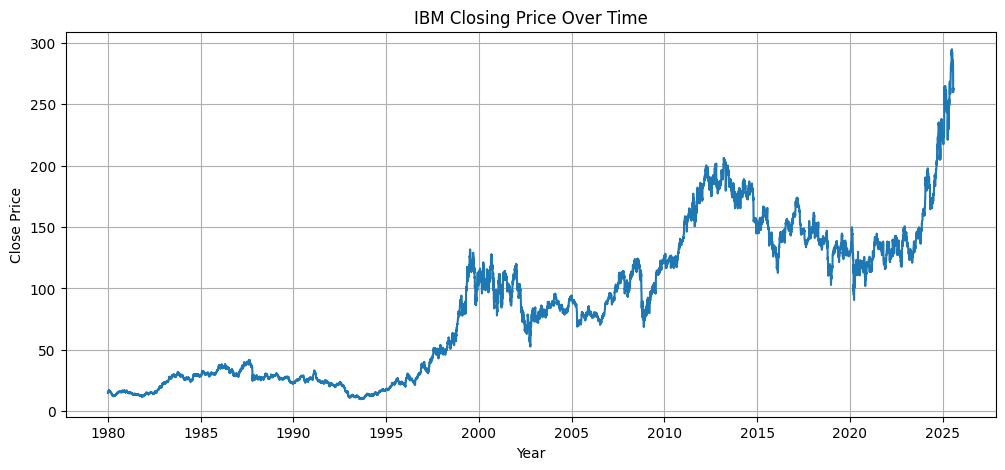

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"])
plt.title("IBM Closing Price Over Time")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


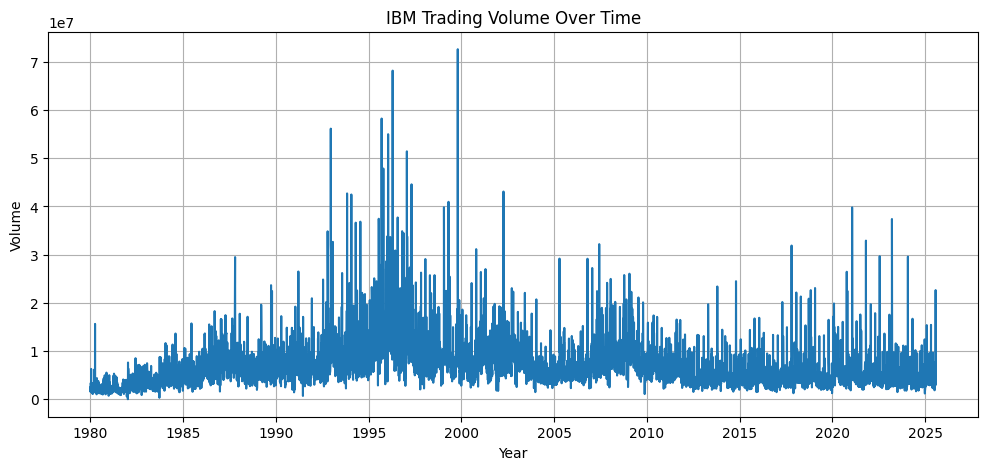

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Volume"])
plt.title("IBM Trading Volume Over Time")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


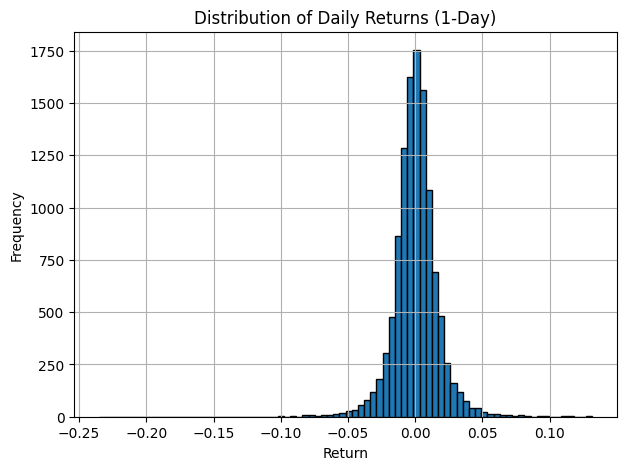

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(df["return_1d"], bins=80, edgecolor = 'black') # Changed 'border' to 'edgecolor'
plt.title("Distribution of Daily Returns (1-Day)")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

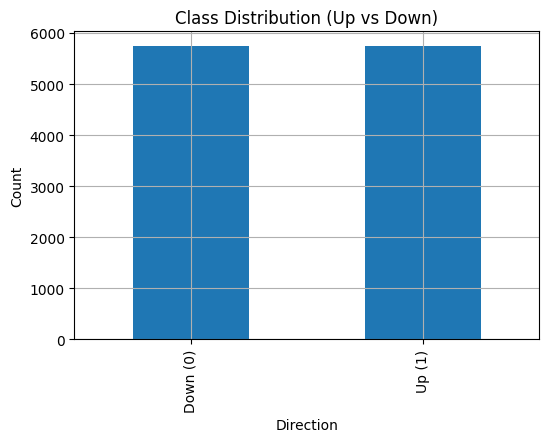

In [ ]:
plt.figure(figsize=(6,4))
df["target_1d_direction"].value_counts().plot(kind="bar")
plt.title("Class Distribution (Up vs Down)")
plt.xlabel("Direction")
plt.ylabel("Count")
plt.xticks([0,1], ["Down (0)", "Up (1)"])
plt.grid(True)
plt.show()


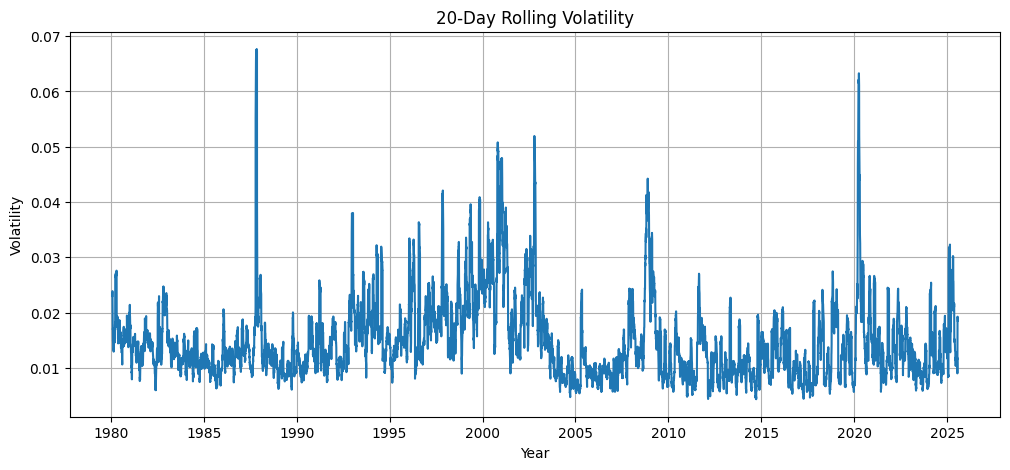

In [ ]:
df["volatility_20d"] = df["return_1d"].rolling(window=20).std()

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["volatility_20d"])
plt.title("20-Day Rolling Volatility")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()


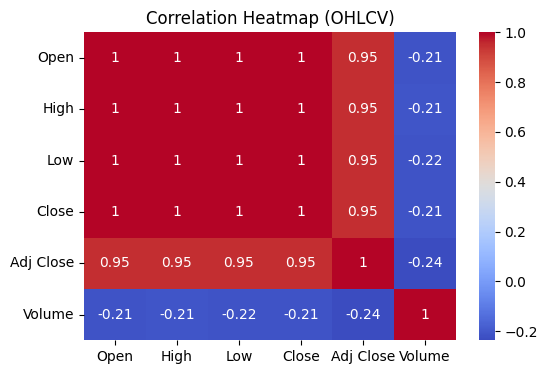

In [ ]:
import seaborn as sns
num_cols = ['Open','High','Low','Close','Adj Close','Volume']
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (OHLCV)")
plt.show()

In [ ]:
# Long-term moving averages
df["SMA50"] = df["Close"].rolling(50).mean()
df["SMA200"] = df["Close"].rolling(200).mean()

# Regime:
# 1 = Uptrend (Close > SMA50 > SMA200)
# 0 = Downtrend/other
df["regime"] = np.where(
    (df["Close"] > df["SMA50"]) & (df["SMA50"] > df["SMA200"]),
    1,
    0
)

# Drop early rows with NaNs due to 200-day MA
df = df.dropna().reset_index(drop=True)

df[["Date", "Close", "SMA50", "SMA200", "regime"]].head()


,Date,Close,SMA50,SMA200,regime
0,1980-10-14,16.670650,15.934512,14.839866,1
1,1980-10-15,16.820028,15.963791,14.849277,1
2,1980-10-16,16.401770,15.978131,14.855402,1
3,1980-10-17,16.252390,15.988886,14.860929,1
4,1980-10-20,16.371893,16.004422,14.867352,1


In [ ]:
# Simple / Exponential MAs
df["SMA_5"]  = df["Close"].rolling(5).mean()
df["SMA_10"] = df["Close"].rolling(10).mean()
df["SMA_20"] = df["Close"].rolling(20).mean()

df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()

# MACD
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["MACD_hist"] = df["MACD"] - df["MACD_signal"]

# RSI (14)
delta = df["Close"].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss.replace(0, np.nan)
df["RSI_14"] = 100 - (100 / (1 + rs))

# Bollinger Bands (20)
df["BB_mid"] = df["Close"].rolling(20).mean()
df["BB_std"] = df["Close"].rolling(20).std()
df["BB_upper"] = df["BB_mid"] + 2 * df["BB_std"]
df["BB_lower"] = df["BB_mid"] - 2 * df["BB_std"]

# ATR (14)
df["H-L"] = df["High"] - df["Low"]
df["H-PC"] = (df["High"] - df["Close"].shift(1)).abs()
df["L-PC"] = (df["Low"] - df["Close"].shift(1)).abs()
df["TR"] = df[["H-L", "H-PC", "L-PC"]].max(axis=1)
df["ATR_14"] = df["TR"].rolling(14).mean()

# Momentum / Returns
df["ret_3"] = df["Close"].pct_change(3)
df["ret_7"] = df["Close"].pct_change(7)
df["ret_14"] = df["Close"].pct_change(14)

# Volume features
df["Volume_lag1"] = df["Volume"].shift(1)
df["Volume_change"] = df["Volume"] - df["Volume"].shift(1)



In [ ]:
# Drop remaining NaNs from rolling/lag features
df = df.dropna().reset_index(drop=True)


In [ ]:
price_cols = ["Open", "High", "Low", "Close"] # features

technical_cols = [
    "SMA_5", "SMA_10", "SMA_20",
    "EMA_12", "EMA_26",
    "MACD", "MACD_signal", "MACD_hist",
    "RSI_14",
    "BB_upper", "BB_lower", "BB_mid",
    "ATR_14"
]

momentum_cols = ["ret_3", "ret_7", "ret_14"]

volume_cols = ["Volume", "Volume_lag1", "Volume_change"]

feature_cols = price_cols + technical_cols + momentum_cols + volume_cols

X = df[feature_cols]
y = df["regime"]  # 1 = uptrend, 0 = downtrend

print("Number of samples:", len(df))
print("Number of features:", len(feature_cols))
print("Class balance:\n", y.value_counts(normalize=True))


Number of samples: 11269
Number of features: 23
Class balance:
 regime
0    0.641051
1    0.358949
Name: proportion, dtype: float64


In [ ]:
n = len(X)
train_end = int(n * 0.6)
val_end   = int(n * 0.8)

X_train = X.iloc[:train_end]
y_train = y.iloc[:train_end]

X_val   = X.iloc[train_end:val_end]
y_val   = y.iloc[train_end:val_end]

X_test  = X.iloc[val_end:]
y_test  = y.iloc[val_end:]

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (6761, 23) Val: (2254, 23) Test: (2254, 23)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

In [ ]:
X_trainval_s = np.vstack([X_train_s, X_val_s])
y_trainval   = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=3000)

# Train
log_reg.fit(X_trainval_s, y_trainval)

# Predict
y_pred_log = log_reg.predict(X_test_s)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Logistic Regression Evaluation")

acc_log  = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log  = recall_score(y_test, y_pred_log)
f1_log   = f1_score(y_test, y_pred_log)

print(f"Accuracy : {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall   : {rec_log:.4f}")
print(f"F1 Score : {f1_log:.4f}")


Logistic Regression Evaluation
Accuracy : 0.7857
Precision: 0.6765
Recall   : 0.7311
F1 Score : 0.7028


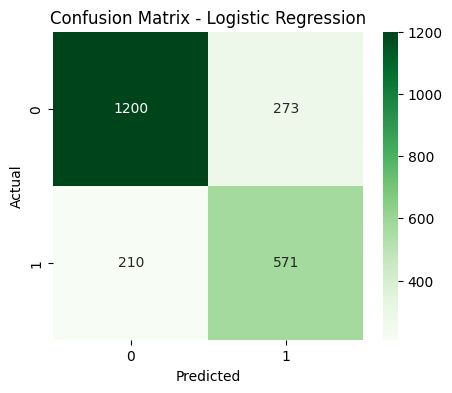

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

# Train
rf.fit(X_trainval_s, y_trainval)

# Predict
y_pred_rf = rf.predict(X_test_s)


In [ ]:
print("Random Forest Evaluation")

acc_rf  = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf  = recall_score(y_test, y_pred_rf)
f1_rf   = f1_score(y_test, y_pred_rf)

print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall   : {rec_rf:.4f}")
print(f"F1 Score : {f1_rf:.4f}")


Random Forest Evaluation
Accuracy : 0.7657
Precision: 0.6170
Recall   : 0.8540
F1 Score : 0.7164


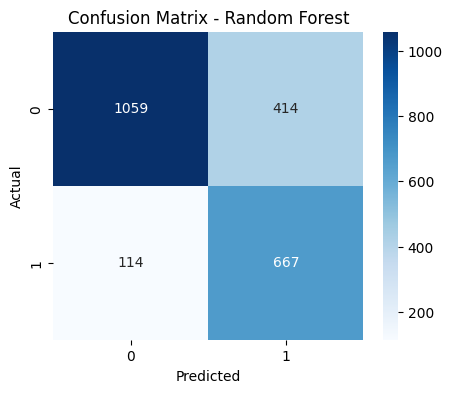

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

# Train
xgb.fit(X_trainval_s, y_trainval)

# Predict
y_pred_xgb = xgb.predict(X_test_s)


In [ ]:
print("XGBoost Evaluation")

acc_xgb  = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb  = recall_score(y_test, y_pred_xgb)
f1_xgb   = f1_score(y_test, y_pred_xgb)

print(f"Accuracy : {acc_xgb:.4f}")
print(f"Precision: {prec_xgb:.4f}")
print(f"Recall   : {rec_xgb:.4f}")
print(f"F1 Score : {f1_xgb:.4f}")


XGBoost Evaluation
Accuracy : 0.7418
Precision: 0.5990
Recall   : 0.7708
F1 Score : 0.6741


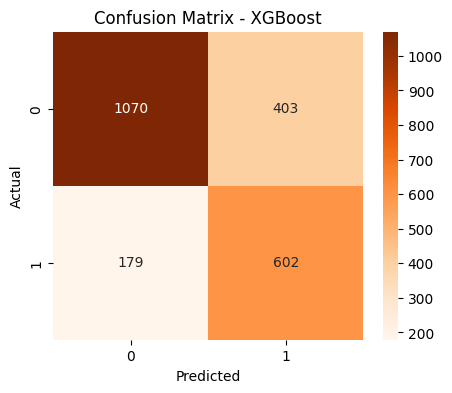

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []

# Logistic Regression
results.append([
    "Logistic Regression",
    accuracy_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_log)
])

# Random Forest
results.append([
    "Random Forest",
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
])

# XGBoost
results.append([
    "XGBoost",
    accuracy_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb),
    recall_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_xgb)
])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.785714   0.676540  0.731114  0.702769
1        Random Forest  0.765750   0.617021  0.854033  0.716434
2              XGBoost  0.741792   0.599005  0.770807  0.674132


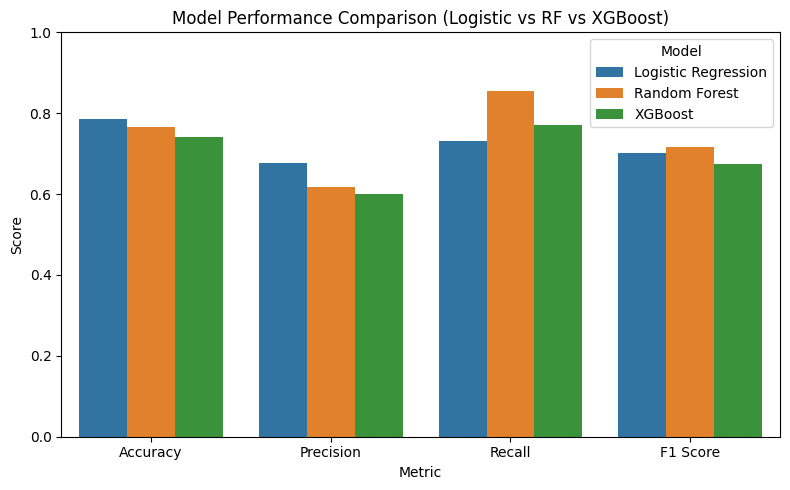

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert wide → long for easy plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8,5))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model")
plt.ylim(0, 1)
plt.title("Model Performance Comparison (Logistic vs RF vs XGBoost)")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


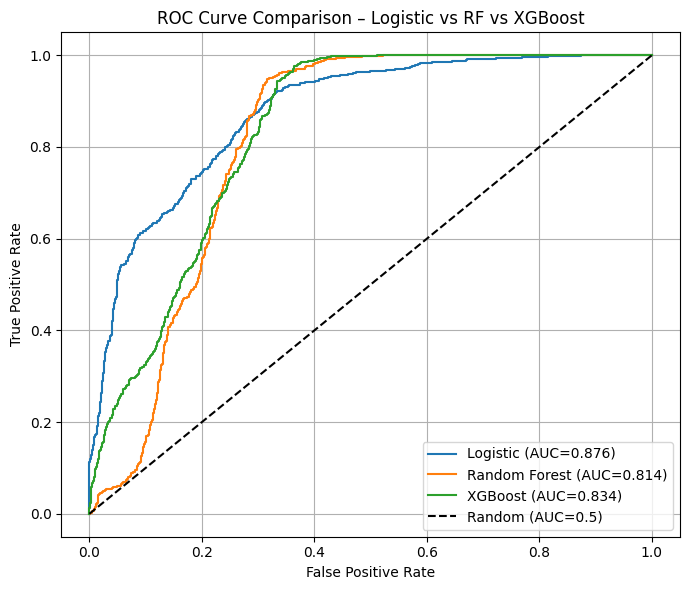

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7,6))

# Logistic Regression
y_prob_log = log_reg.predict_proba(X_test_s)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={auc_log:.3f})")

# Random Forest
y_prob_rf = rf.predict_proba(X_test_s)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")

# XGBoost
y_prob_xgb = xgb.predict_proba(X_test_s)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")

# Baseline
plt.plot([0,1],[0,1],"k--", label="Random (AUC=0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Logistic vs RF vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


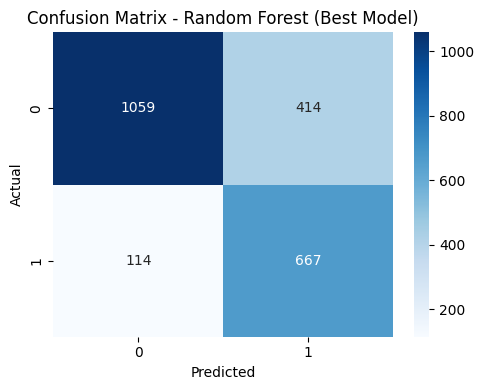

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

rf_compare = pd.DataFrame({
    "Actual":   y_test.values,
    "Predicted": y_pred_rf
}, index=y_test.index)

print(rf_compare.head(20))


      Actual  Predicted
9015       1          1
9016       1          1
9017       1          1
9018       1          1
9019       1          1
9020       1          1
9021       1          1
9022       1          1
9023       1          1
9024       1          1
9025       1          1
9026       1          1
9027       1          1
9028       1          1
9029       1          1
9030       1          1
9031       1          0
9032       1          1
9033       1          1
9034       1          1


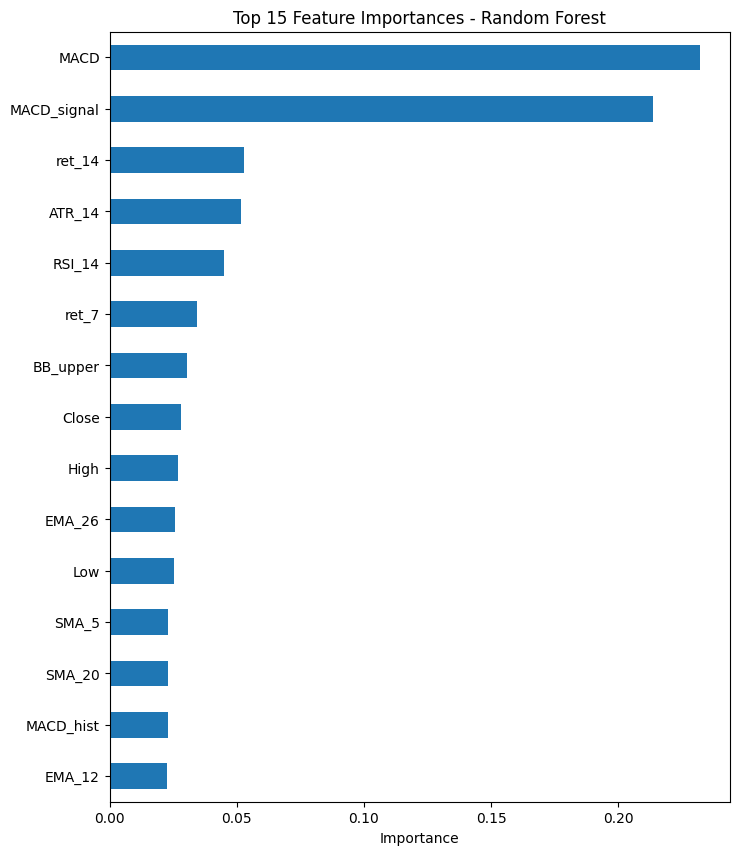

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importance = pd.Series(
    rf.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

plt.figure(figsize=(8,10))
rf_importance.head(15).plot(kind="barh")
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


                      Importance
Price                   0.100875
Technical Indicators    0.755404
Momentum Features       0.109183
Volume Features         0.034539


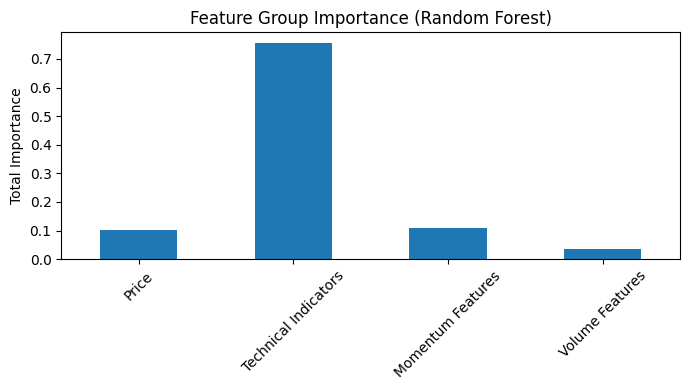

In [ ]:
group_importance = {
    "Price": rf_importance[price_cols].sum(),
    "Technical Indicators": rf_importance[technical_cols].sum(),
    "Momentum Features": rf_importance[momentum_cols].sum(),
    "Volume Features": rf_importance[volume_cols].sum(),
}

group_importance_df = pd.DataFrame.from_dict(group_importance, orient="index", columns=["Importance"])
print(group_importance_df)

group_importance_df.plot(kind="bar", figsize=(7,4), legend=False)
plt.title("Feature Group Importance (Random Forest)")
plt.ylabel("Total Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
